# Случайные процессы. Прикладной поток.
## Практическое задание 3

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[СП17] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* При проверке некоторый код из вашего решения будет **проверяться автоматически**. Этот код вы должны скопировать в файл с названием `c3.N.py` и прислать вместе с решением. Что именно должно быть в этом файле, написано далее. Код должен корректно работать в Python 3.5 под Убунту.

--------------

Для выполнения задания потребуются следующие библиотеки: bs4, urllib, networkx. Следующими командами можно их поставить (Ubuntu):

sudo pip3 install beautifulsoup4

sudo pip3 install urllib2

sudo pip3 install networkx

--------------

## PageRank

#### История

(Взято с <a href='https://ru.wikipedia.org/wiki/PageRank'>Википедии</a>)

В 1996 году Сергей Брин и Ларри Пейдж, тогда ещё аспиранты Стэнфордского университета, начали работу над исследовательским проектом BackRub — поисковой системой по Интернету, использующей новую тогда идею о том, что веб-страница должна считаться тем «важнее», чем больше на неё ссылается других страниц, и чем более «важными», в свою очередь, являются эти страницы. Через некоторое время BackRub была переименована в Google. Первая статья с описанием применяющегося в ней метода ранжирования, названного PageRank, появилась в начале 1998 года, за ней следом вышла и статья с описанием архитектуры самой поисковой системы.

Их система значительно превосходила все существовавшие тогда поисковые системы, и Брин с Пейджем, осознав её потенциал, основали в сентябре 1998 года компанию Google Inc., для дальнейшего её развития как коммерческого продукта.

#### Описание

Введем понятие веб-графа. Ориентированный граф $G = (V, E)$ называется веб-графом, если 
* $V = \{url_i\}_{i=1}^n$ --- некоторое подмножество страниц в интернете, каждой из которых соответствует адрес $url_i$.
* Множество $E$ состоит из тех и только тех пар $(url_i, url_j)$, для которых на странице с адресом $url_i$ есть 
ссылка на $url_j$.

Рассмотрим следующую модель поведения пользователя. В начальный момент времени он выбирает некоторую страницу из $V$ в соответствии с некоторым распределением $\Pi^{(0)}$. Затем, находясь на некоторой странице, он может либо перейти по какой-то ссылке, которая размещена на этой странице, либо выбрать случайную страницу из $V$ и перейти на нее (damping factor). Считается, что если пользователь выбирает переход по ссылке, то он выбирает равновероятно любую ссылку с данной страницы и переходит по ней. Если же он выбирает переход не по ссылке, то он также выбирает равновероятно любую страницу из $V$ и переходит на ее (в частности может остаться на той же странице). Будем считать, что переход не по ссылке пользователь выбирает с некоторой вероятностью $p \in (0, 1)$. Соответственно, переход по ссылке он выбирает с вероятностью $1 - p$. Если же со страницы нет ни одной ссылки, то будем считать, что пользователь всегда выбирает переход не по ссылке.

Описанная выше модель поведения пользователя называется моделью PageRank. Нетрудно понять, что этой модели соответствует некоторая марковская цепь. Опишите ее.
* Множество состояний: $\mathcal{X} \equiv V$, в частности, т.к. число страниц конечно, можно считать, что это $\{1 ... |V|\}$
* Начальное распределение: исходя из текста выше - это некоторое $\Pi^{(0)}$; но на семинаре оговаривалось, что это - равномерное распределение $((\frac{1}{|V|}, ... , \frac{1}{|V|}) \in R^{|V|})$
* Переходные вероятности:

Обозначим за $N_i$ число исходящих ссылок на сайте $url_i$. Тогда, если $N_i = 0$, то переходы определяются исключительно "телепортациями" и $p_{ij} = \frac{1}{|V|}$. При $N_i > 0$ с вероятностью p будет выбран "переход не по ссылке = телепорт" - для фиксированого j: $\frac{p}{|V|}$, соответственно, с вероятностью (1 - p) будет переход по ссылке - это добавит, при фиксированном j и при наличии ссылки $\frac{1 - p}{N_i}$. Итого:
$$
p_{ij} = 
\begin{equation*}
 \begin{cases}
    \displaystyle \frac{p}{|V|} + \frac{1 - p}{N_i} \cdot I( (u_i, u_j) \in E)  &\text{if N_i > 0}
   \\
    \displaystyle \frac{1}{|V|}  &\text{if N_i = 0}
 \end{cases}
\end{equation*}$$

Заметим, что $\forall i :\sum\limits_{j=1}^{|V|} {p_{ij}} = 1$  (мы ничего не потеряли)

#### Вычисление

Данная марковская цепь является эргодической. Почему?

____
**Ответ:** эргодические марковские цепи характеризуются сильно связным графом (обязательно конечным, что верно в нашем случае), или, говоря в терминах эргодической теоремы, $\exists n_0 : \forall i,j : p_{ij}(n_0) > 0 $ В нашем случае, это верно при $n_0 = 1$, т.к. с ненулевой вероятностью $p > 0$ может быть выбрана "телепортация", т.е. $\exists n_0 = 1 : \forall i,j : p_{ij}(n_0) \geq \frac{p}{|V|} > 0 $

В частности, если ссылок из страницы i в страницу j нет, то $p_{ij}(1) = \frac{1}{|V|} > \frac{p}{|V|} > 0$
____
А это означает, что цепь имеет некоторое эргодическое распределение $\Pi$, которое является предельным и единственным стационарным. Данное распределение называется весом PageRank для нашего подмножества интернета.

Как вычислить это распределение $\Pi$ для данного веб-графа? Обычно для этого используют степенной метод (power iteration), суть которого состоит в следующем. Выбирается некоторое начальное распределение $\Pi^{(0)}$. Далее производится несколько итераций по формуле $\Pi^{(k)} = \Pi^{(k - 1)} P$, где $P$ --- матрица переходных вероятностей цепи, до тех пор, пока $\left|\left|\Pi^{(k)} - \Pi^{(k - 1)}\right|\right| > \varepsilon$. Распределение $\Pi^{(k)}$ считается приближением распредения $\Pi$.

Имеет ли смысл выполнять подобные итерации для разных начальных распределений $\Pi^{(0)}$ с точки зрения теории?

_______________
**Ответ:** Согласно Эргодической теореме, эргодическое распределение является и единственным стационарным, и предельным. А предельное распределение $\Pi$ - такое распределение, что для любого начального распределения $\Pi^{(0)}$ верно: $\lim\limits_{n \rightarrow \infty} (\Pi^{(0)}P^n) = \Pi$ 

Таким образом, при любом начальном распределении предел будет один.
_______________

А с точки зрения практического применения, не обязательно при этом доводя до сходимости?

________________
**Ответ:**  Ясно, что хороший выбор начального распределения уменьшает число итераций (например, если мы положим начальное распределение, равное или близкое к предельному). С другой стороны, наша верхняя оценка на скорость сходимости не зависит от начального распределения.

Если в начальном распределении указать вероятность некоторой страницы 1, то можно таким образом, вычисляя $\Pi^{(k)}$, прогнозировать поведение пользователя на k шагов в перёд.

Также, это поволяет выделять схожие по тематике (с некоторыми оговорками) страницы. Более подробно - в конце ноутбука, там **приведён алгоритм кластеризации страниц по похожести с помощью page rank, не доведённого до сходимости.**
________________

Какая верхняя оценка на скорость сходимости?

________________
**Ответ:** Для произвольного эргодического распределения имеем:
$\displaystyle \left|p_{ij}^{(n)} - \pi_j\right| = O((1-\varepsilon)^{\frac{n}{n_0}})$, где $e = \min\limits_{i,j} p_{ij}^{n_0} > 0$

Для PageRank эта формула примет вид:

$\displaystyle e \geq \frac{p}{|V|}, n_0 = 1 \Rightarrow
 \displaystyle \left|p_{ij}^{(n)} - \pi_j\right| = O((1-\frac{p}{|V|})^{n})$
 
 
**Примечание:** запись вида $f(x) \leq O(g(x))$ эквивалентна $f(x) = O(g(x)) $ (ведь речь идёт об $O$ большом, а не $\Theta$)

($0 = O(g(x))$ для произвольной g(x) > 0, например) 
________________


## Часть 1


In [2]:
import numpy as np
from scipy.stats import bernoulli
import networkx
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urlparse, urlunparse
from time import sleep
from itertools import product
import matplotlib.pyplot as plt

%matplotlib inline

Реализуйте вычисление весов PageRank power-методом.

Реализовать может быть удобнее с помощью функции np.nan_to_num, которая в данном numpy.array заменит все вхождения nan на ноль. Это позволяет удобно производить поэлементное деление одного вектора на другой в случае, если во втором векторе есть нули.

In [17]:
def create_page_rank_markov_chain(links, damping_factor=0.15, N=None):
    ''' По веб-графу со списком ребер links строит матрицу 
    переходных вероятностей соответствующей марковской цепи.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        damping_factor --- вероятность перехода не по ссылке (float);
        
        Возвращает prob_matrix --- numpy.matrix, shape=(|V|, |V|).
    '''

    links = np.array(links)
    if N is None:
        N = links.max() + 1  # Число веб-страниц  <-- НЕТ !!!
        # Не работает, когда последняя вершина изолирована!!!
        # для этого был добавлен параметр
    
    ### begin code
    
    edge_matrix = np.zeros((N, N), dtype=int)  # создадим матрицу смежности
    for edge in links:
        edge_matrix[edge[0], edge[1]] = 1 
        # мы запрещаем кратные рёбра, согласно определению выше
    
    prob_matrix = np.zeros((N, N), dtype=float)  # матрица переходных вероятностей
    for vertex_id in range(N):
        outgoing_links = edge_matrix[vertex_id, :].sum()  # Ni в старых терминах
        if (outgoing_links == 0):
            prob_matrix[vertex_id, :] = np.ones(N, dtype=float) / N
        else:
            for dest_id in range(N):
                prob_matrix[vertex_id, dest_id] = (
                    damping_factor / N +
                    (1. - damping_factor) / outgoing_links * edge_matrix[vertex_id, dest_id]
                )
            
            
    ### end code
    
    return prob_matrix

create_page_rank_markov_chain([[1, 2], [0, 1], [0, 1]])

array([[ 0.05      ,  0.9       ,  0.05      ],
       [ 0.05      ,  0.05      ,  0.9       ],
       [ 0.33333333,  0.33333333,  0.33333333]])

In [18]:
def page_rank(links, start_distribution, damping_factor=0.15, 
              tolerance=10 ** (-7), return_trace=False, N=None):
    ''' Вычисляет веса PageRank для веб-графа со списком ребер links 
    степенным методом, начиная с начального распределения start_distribution, 
    доводя до сходимости с точностью tolerance.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        start_distribution --- вектор размерности |V| в формате numpy.array;
        damping_factor --- вероятность перехода не по ссылке (float);
        tolerance --- точность вычисления предельного распределения;
        return_trace --- если указана, то возвращает список распределений во 
                            все моменты времени до сходимости
    
        Возвращает:
        1). если return_trace == False, то возвращает distribution --- 
        приближение предельного распределения цепи,
        которое соответствует весам PageRank.
        Имеет тип numpy.array размерности |V|.
        2). если return_trace == True, то возвращает также trace ---
        список распределений во все моменты времени до сходимости. 
        Имеет тип numpy.array размерности 
        (количество итераций) на |V|.
    '''
    prob_matrix = create_page_rank_markov_chain(links, 
                                                damping_factor=damping_factor, N=N)
    distribution = np.matrix(start_distribution)
    
    ### begin code
    trace = [distribution]  # включаем нулевую итерацию
    while True:
        new_distribution = distribution @ prob_matrix
        trace.append(new_distribution)

        if (np.linalg.norm(new_distribution - distribution, ord=2) <= tolerance):
            break;
        
        distribution = new_distribution
    ### end code
    
    if return_trace:
        return np.array(distribution).ravel(), np.array(trace)
    else:
        return np.array(distribution).ravel()

**Автоматическая проверка**

Реализацию функций create_page_rank_markov_chain и page_rank скопируйте в файл с названием `c3.N.py` и вышлите на почту. Будет проверяться только корректность выдаваемых значений. Проверки на время работы не будет.

----------

Давайте посмотрим, как оно работает.
Напишите для начала функцию для генерации случайного ориентированного графа $G(n, p)$. Случайный граф генерируется следующий образом. Берется множество $\{0, ..., n-1\}$, которое есть множество вершин этого графа. Ребро $(i, j)$ (пара упорядочена, возможно повторение) добавляется в граф независимо от других ребер с вероятностью $p$.

In [181]:
def random_graph(n, p):
    rvs = bernoulli(p).rvs((n, n)) 
    # можно было бы и подставить в цикл для (1, 1), получив решение в одну строчку, 
    # но так работает значительно быстрее
        
    return [(i , j) for i in range(n)
                       for j in range(n) if rvs[i, j]]

In [182]:
len(random_graph(5000, 0.2)) / (5000*5000)

0.19995048

Теперь сгенерируем случайный граф и нарисуем его.

[(0, 4), (0, 8), (2, 4), (2, 5), (2, 7), (2, 8), (3, 2), (3, 5), (3, 8), (4, 2), (4, 4), (4, 7), (5, 1), (5, 7), (5, 8), (5, 9), (6, 2), (7, 2), (7, 9), (8, 1), (9, 2), (9, 4), (9, 7)]


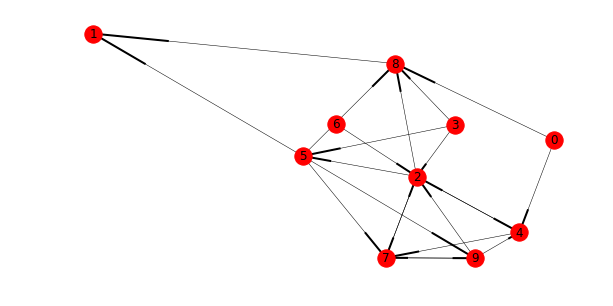

In [174]:
N, p = 10, 0.2
edges = random_graph(N, p)
print(edges)
G = networkx.DiGraph()
G.add_edges_from(edges)

plt.figure(figsize=(10, 5))
plt.axis('off')
networkx.draw_networkx(G, width=0.5)

Посчитаем его PageRank и изобразим так, чтобы размер вершины был пропорционален ее весу.

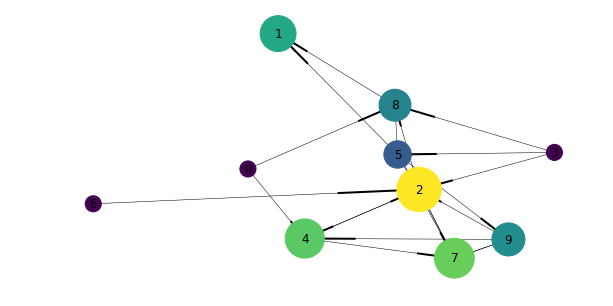

In [175]:
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4

plt.figure(figsize=(10, 5))
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

Как мы уже отмечали выше, эргодическая теорема дает верхнюю оценку на скорость сходимости. Давайте посмотрим, насколько она является точной. Для этого при вычислении PageRank нужно установить флаг return_trace.

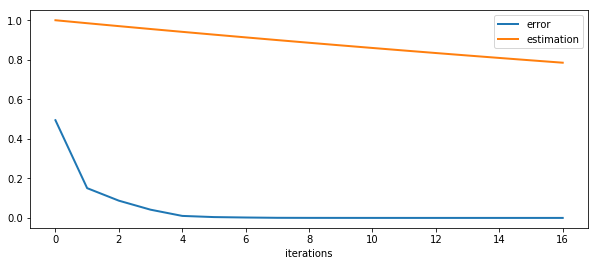

In [176]:
pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True)

#print(pr_trace)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))

plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')

prob_matrix = create_page_rank_markov_chain(edges)  # для взятия минимума и оценки более точной, чем p/|V|
plt.plot(x, (1. - prob_matrix.min()) ** x,  # верхняя оценка скорости сходимости из эргодической теоремы
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

**Выводы:** похоже, что константа в оценке скорости сходимости мала и/или сама оценка скорости сходимости достаточно грубая. Похоже, что PR может быть вычислен за малое число итераций, но для этого требуется исследование ниже.

_______________________

Проведите небольшое исследование. В ходе исследования выясните, как скорость сходимости (количество итераций до сходимости) зависит от $n$ и $p$, а так же начального распределения. Вычислите также веса PageRank для некоторых неслучайных графов. В каждом случае стройте графики. От чего зависит вес вершины?

__________
Напишем несколько полезных функций
__________

In [203]:
def page_rank_interations_count(N, p, start_distribution=None):
    ''' Вычисляет число итерации вычисления PageRank для данных параметров
    '''
    
    if start_distribution is None:
        start_distribution = np.ones((1, N)) / N
        
    edges = random_graph(N, p)
    pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True, N=N)
    return pr_trace.shape[0]

def page_rank_interations_count_multirun(N, p, runs = 100,
                                    start_distribution=None):
    ''' Вычисляет число итерации вычисления PageRank для данных
    параметров для run запусков
    '''
    return np.array(
        [page_rank_interations_count(N, p, start_distribution) for i in range(runs)]
    )


__________
Исследуем дисперсию количества итераций с помощью диаграммы "ящик с усами" при фиксированном начальном распределении - равномерном
__________

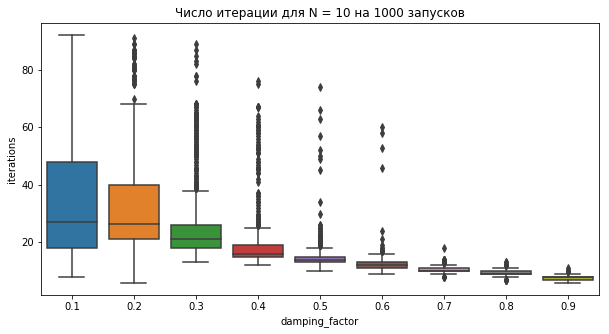

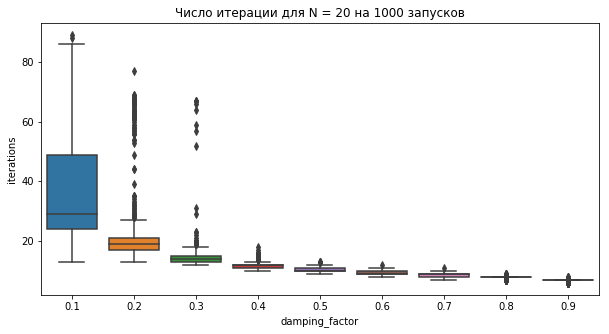

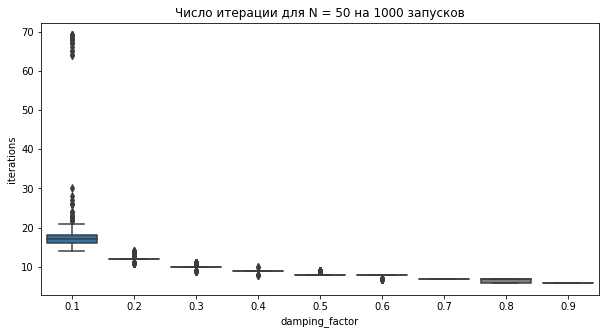

CPU times: user 4min 1s, sys: 1.37 s, total: 4min 2s
Wall time: 4min 1s


In [215]:
%%time
import seaborn as sns
runs = 1000
n_array = [10, 20, 50]
for n in n_array:
    x = np.arange(0.1, 1, 0.1)
    y = [page_rank_interations_count_multirun(n, p, runs=runs) for p in x]
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=x, y=y)
    plt.ylabel("iterations")
    plt.xlabel("damping_factor")
    plt.title("Число итерации для N = %d на %d запусков" % (n, runs))
    plt.show()

**Комментарий:** Наблюдаем то, что кажется интуитивно понятным - при росте p граф стремится к полному, когда из любой вершины до любой можно до любой по рёбрам за малое число шагов, и сходимость наблюдается почти за константное число шагов 

При росте N межквартильный (25% - 75%) размах уменьшается (как я полагаю, из-за малого числа runs - число всех графов растёт, а число запусков - нет, из-за чего критичные(например, сильно разреженные) графы появляются реже), однако, при малых значениях p, максимальное время (показано самой верхней точкой или, если точек, которые считаются выбросами нет, то верхней горизонтальной чертой) значительно больше среднего (70 против ~17 для N,p = 50, 0.1), что может говорить о том, что среднее временя работы на случайном графе слабо связано с максимальным временем работы.

Вообще говоря, реальные графы сайтов очень слабо похожи на случайные как минимум тем, что у них выделена главная страница.

___________________
Построим график зависимости при фиксированном начальном (равномерном) распределении и N = 50
___________________


[[ 2  2  2 ...,  2  2  2]
 [16 17 12 ..., 18 15 15]
 [73 62 43 ..., 71 19 68]
 ..., 
 [ 5  5  5 ...,  5  5  5]
 [ 5  5  5 ...,  5  5  5]
 [ 2  2  2 ...,  2  2  2]]


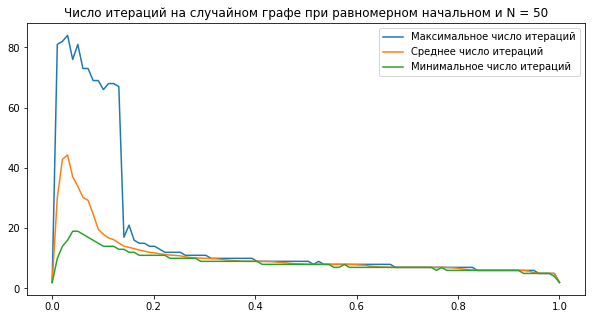

CPU times: user 3min 8s, sys: 552 ms, total: 3min 9s
Wall time: 3min 9s


In [249]:
%%time
runs = 100
N = 50
x = np.linspace(0, 1, 100)
y = np.matrix([page_rank_interations_count_multirun(N, p, runs=runs) for p in x])
print(y)
plt.figure(figsize=(10, 5))
plt.title("Число итераций на случайном графе при равномерном начальном и N = 50")
plt.plot(x, y.max(axis=1), label="Максимальное число итераций")
plt.plot(x, y.mean(axis=1), label="Среднее число итераций")
plt.plot(x, y.min(axis=1), label="Минимальное число итераций")
plt.legend()
plt.show()

**Комментарий:** Как уже говорилось, при росте p максимальное и минимальное время работы стремяться друг к другу.

___________________
Построим график зависимости сразу от двух параметров при фиксированном равномерном начальном распределении
___________________

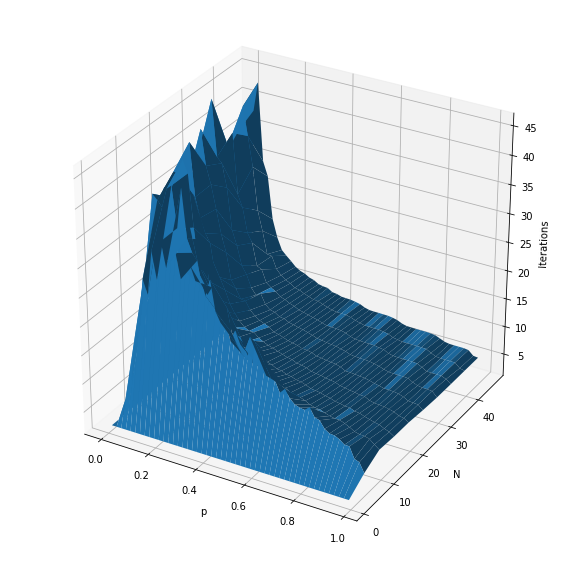

CPU times: user 3min 55s, sys: 204 ms, total: 3min 55s
Wall time: 3min 55s


In [248]:
%%time
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
runs = 50
X = np.arange(0, 1, 0.02) # p
Y = np.arange(1, 51, 5) # N
X, Y = np.meshgrid(X, Y)

Z = [] # итерации
for i in range(X.shape[0]):
    Z_line = []
    for j in range(X.shape[1]):
        Z_line.append(page_rank_interations_count_multirun(Y[i,j], X[i,j],
                                                        runs=runs).mean())
    Z.append(Z_line)
    
Z = np.array(Z)

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel("p")
ax.set_ylabel("N")
ax.set_zlabel('Iterations')
plt.show()

**Комментарий:** интересное замечение по двум последним графикам состоит в том, что число среднее итераций на случайном графе падает как при увеличении p, так и при увеличении N.

___________
Для исследования зависимости от начального распределения, переберём все дискретные приближения распределений:

рекурсивным перебором найдём все массивы длины N из натуральных чисел с нулём, т.ч. сумма в них равна S. После этого, расделив все числа в массиве на S - найдём приближение.

Положим N = 10, S = 10, p = 0.2
_________

In [277]:
pi0 = []  # здесь будем хранить ответ

def recursive_brut(level = 0, total_levels = 10, max_sum=10, prefix=[]):
    prefix_sum = np.array(prefix).sum() if len(prefix) > 0 else 0
    if (prefix_sum > max_sum):
        return
    if (level == total_levels):
        if (prefix_sum == max_sum):
            pi0.append(prefix[:])
        return
    for i in range(max_sum - prefix_sum + 1):
        prefix.append(i)
        recursive_brut(level+1, total_levels, max_sum, prefix)
        del prefix[-1]
        
recursive_brut()
pi0 = np.matrix(pi0)
print("Первые 5\n", pi0[:5],"\nПоследние 5\n", pi0[-5:])

Первые 5
 [[ 0  0  0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  0  0  0  1  9]
 [ 0  0  0  0  0  0  0  0  2  8]
 [ 0  0  0  0  0  0  0  0  3  7]
 [ 0  0  0  0  0  0  0  0  4  6]] 
Последние 5
 [[ 9  0  0  0  1  0  0  0  0  0]
 [ 9  0  0  1  0  0  0  0  0  0]
 [ 9  0  1  0  0  0  0  0  0  0]
 [ 9  1  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0]]


________
Запустим на ФИКСИРОВАННОМ графе.
________

In [ ]:
%%time
N = 10
p = 0.2

edges = random_graph(N, p)

iterations = []
for start_distribution in pi0:
    pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                  return_trace=True, N=N)
    iterations.append(pr_trace.shape[0])
    
iterations = np.array(iterations)

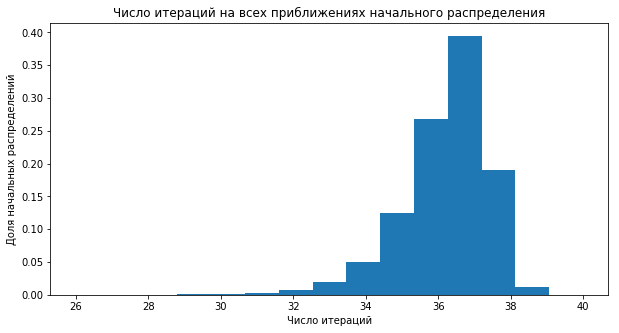

In [296]:
plt.figure(figsize=(10,5))
plt.hist(iterations, bins=(iterations.max() - iterations.min() + 1), normed=True)
plt.title("Число итераций на всех приближениях начального распределения")
plt.ylabel("Доля начальных распределений")
plt.xlabel("Число итераций")
plt.show()

___________________
**Комментарий:** Можно заметить, что в целом, при данных параметрах, выбор начального распределения число интераций растёт незначительно, т.е. нет начального распределения такого, что итераций больше среднего хотя бы в два раза. Конечно же, если наше приближение похоже на эталонное (предельное и **единственное** стационарное), число итераций падает значительно.
__________________

Рассмотрим некоторые неслучайные графы

In [387]:
def draw_nice_graph_with_page_rank(N, edges, start_distribution, show_hist=False):
    pr_distribution, pr_trace  = page_rank(edges, start_distribution,
                                           return_trace=True)

    size_const = 10 ** 4

    plt.figure(figsize=(14, 5))
    if (show_hist):
        plt.subplot(121)
    plt.axis('off')
    G = networkx.DiGraph()
    G.add_edges_from(edges)

    print("Число итераций = ", pr_trace.shape[0])
    print("Веса PR = ", pr_distribution)
    networkx.draw_networkx(G, width=0.3, node_size=size_const * pr_distribution, 
                           node_color=pr_distribution)
    
    if (show_hist):
        plt.subplot(122)
        plt.ylim(ymin=0, ymax=pr_distribution.max()*1.05)
        plt.scatter(np.arange(N), pr_distribution, label="Веса Page Rank")
        plt.xlabel("Номер вершины")
        plt.legend()
        plt.show()

**Полный граф**

Число итераций =  3
Веса PR =  [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]


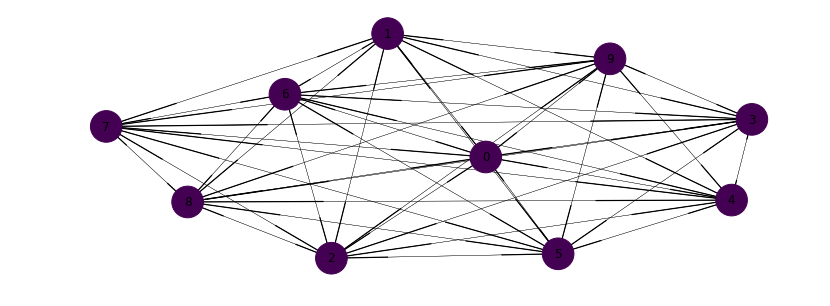

In [388]:
N = 10
edges = [(i,j) for i in range(N) for j in range(N)]
start_distribution = np.zeros(N)
start_distribution[0] = 1
draw_nice_graph_with_page_rank(N, edges, start_distribution)

**Комментарий:** Предсказуемо, т.к. в матрице переходов записано одно и то же число. Начальное распределение было выбрано (1, 0, 0 ...). Сошлось за 3 итерации: 0, 1 и 2. Ясно, что на пустом графе веса будут такие же.

**Однонаправленный бамбук**

Число итераций =  47
Веса PR =  [ 0.02752822  0.05092722  0.07081635  0.0877221   0.10209197  0.11430636
  0.12468861  0.13351355  0.14101478  0.14739084]


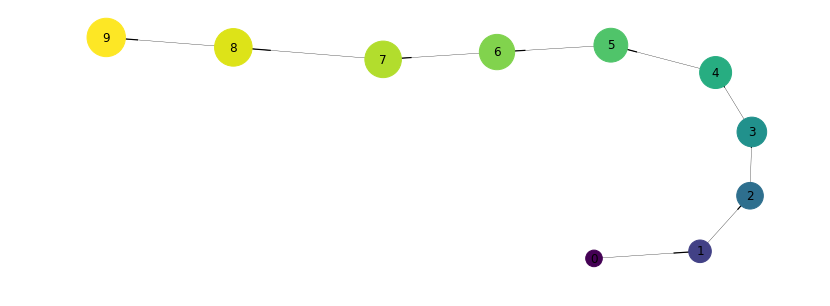

In [390]:
N = 10
edges = [(i, i + 1) for i in range(N - 1)]
start_distribution = np.zeros(N)
start_distribution[0] = 1

draw_nice_graph_with_page_rank(N, edges, start_distribution)

**Комментарий:** Ещё один предсказуемый результат, ибо нетелепортирующийся человек неизбежно приходит в последнюю вершину

**Двунаправленный бамбук**

Число итераций =  99
Веса PR =  [ 0.06438441  0.11619866  0.10934559  0.10579103  0.1042803   0.10428033
  0.105791    0.10934562  0.11619862  0.06438443]


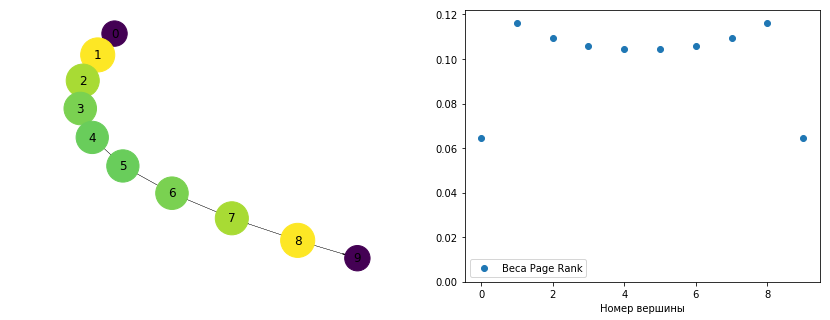

In [391]:
N = 10
edges = [(i, i + 1) for i in range(N - 1)] + [(i + 1, i) for i in range(N - 1)]
start_distribution = np.zeros(N)
start_distribution[0] = 1

draw_nice_graph_with_page_rank(N, edges, start_distribution,
                               show_hist=True)

**Комментарий:** Я ожидал нормальное распределение, но получилось почти что равномерное (без концевых вершин)

**"Реальный сайт"** - в реальных сайтах, как я понимаю, можно моделировать так: есть подграф - полный - его вершины это главная страница (0) и страницы основных тематик (1 ... N_themes), тогда как все остальные страницы (N_themes + 1 ... N) относятся к некоторой тематике и доступны только из главной страницы тематики. При этом полный подграф главных страниц доступен отовсюду (каждая его вершина)

Число итераций =  27
Веса PR =  [ 0.1112466   0.1112466   0.1112466   0.1112466   0.1112466   0.00554709
  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709
  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709
  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709
  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709
  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709
  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709
  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709
  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709
  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709
  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709
  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709
  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709  0.00554709
  0.00554709  0.005

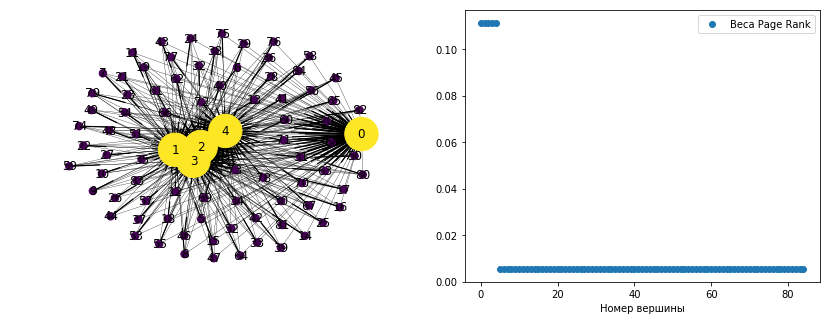

In [392]:

N_main_comp = 5
N_pages_per_theme = 20
N_themes = N_main_comp - 1  # главная страница - не тематическая
N = N_main_comp + N_pages_per_theme * N_themes
edges = [(i, j) for i in range(N_main_comp)
                 for j in range(N_main_comp)]
edges += [(i, j) for i in np.arange(N - N_main_comp) + N_main_comp
                  for j in range(N_main_comp)]

for theme in np.arange(N_themes) + 1:
    for i in range(N_pages_per_theme):
        target_page_id = N_main_comp + (theme - 1) * N_pages_per_theme + i
        edges += [(theme, target_page_id)]
        
        
start_distribution = np.zeros(N)
start_distribution[0] = 1

draw_nice_graph_with_page_rank(N, edges, start_distribution, show_hist=True)

**Комментарий:** Видно, что page rank высоко оценивает только основные страницы.

**"Реальный сайт c разным числом страниц в тематиках"**

Число итераций =  16
Веса PR =  [ 0.22554001  0.22554001  0.22554001  0.05084181  0.05084181  0.03167091
  0.03167091  0.03167091  0.03167091  0.03167091  0.03167091  0.03167091]


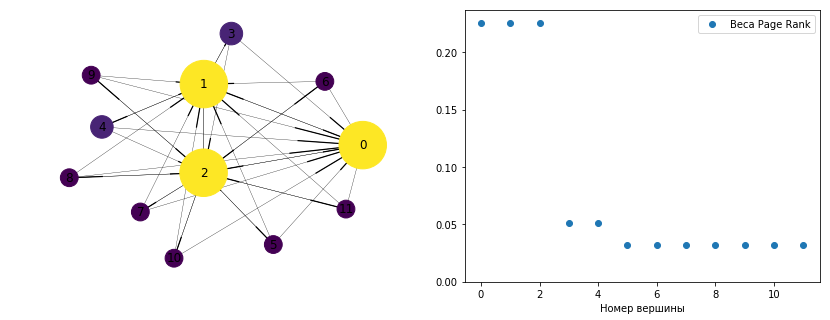

In [393]:

N_main_comp = 3
N_pages_per_theme = np.array([2, 7])  # две темы по 2 и 7 страниц
N_themes = N_main_comp - 1  # главная страница - не тематическая
N = N_main_comp + N_pages_per_theme.sum()
edges = [(i, j) for i in range(N_main_comp)
                 for j in range(N_main_comp)]
edges += [(i, j) for i in np.arange(N - N_main_comp) + N_main_comp
                  for j in range(N_main_comp)]

for theme in np.arange(N_themes) + 1:
    for i in range(N_pages_per_theme[theme-1]):
        target_page_id = N_main_comp + N_pages_per_theme[:theme-1].sum() + i
        edges += [(theme, target_page_id)]
        
        
start_distribution = np.zeros(N)
start_distribution[0] = 1

draw_nice_graph_with_page_rank(N, edges, start_distribution, show_hist=True)

**Комментарий:** Примечательно, что PR страниц в малой тематике больше, чем в большой (вероятность попасть в страницу малой тематики больше, чем в страницу большой)

## Часть 2

В этой части вам предстоит построить реальный веб-граф и посчитать его PageRank. Ниже определены вспомогательные функции.

In [13]:
def load_links(url, sleep_time=1, attempts=5, timeout=20):
    ''' Загружает страницу по ссылке url и выдает список ссылок, 
    на которые ссылается данная страница.
        url --- string, адрес страницы в интернете;
        sleep_time --- задержка перед загрузкой страницы;
        timeout --- время ожидания загрузки страницы;
        attempts --- число попыток загрузки страницы. 
        Попытка считается неудачной, если выбрасывается исключение.
    
        В случае, если за attempts попыток не удалось загрузить страницу,
        то последнее исключение пробрасывается дальше.
    '''
    
    sleep(sleep_time)
    parsed_url = urlparse(url)
    links = []

    # Попытки загрузить страницу
    for i in range(attempts):
        try:
            # Ловить исключения только из urlopen может быть недостаточно. 
            # Он может выдавать какой-то бред вместо исключения, 
            # из-за которого исключение сгенерирует BeautifulSoup
            soup = BeautifulSoup(urlopen(url, timeout=timeout), 'lxml')
            break
            
        except Exception as e:
            print(e)
            if i == attempts - 1:
                raise e

    for tag_a in soup('a'):  # Посмотр всех ссылочных тегов
        if 'href' in tag_a.attrs:
            link = list(urlparse(tag_a['href']))
            
            # Если ссылка является относительной,
            # то ее нужно перевести в абсолютную
            if link[0] == '': link[0] = parsed_url.scheme
            if link[1] == '': link[1] = parsed_url.netloc
            
            links.append(urlunparse(link))
            
    return links


def get_site(url):
    ''' По ссылке url возвращает адрес сайта. '''
    
    return urlparse(url).netloc

Код ниже загружает $N$ веб-страниц, начиная с некоторой стартовой страницы и переходя по ссылкам. Загрузка происходит методом обхода в ширину. Все собранные урлы страниц хранятся в urls. В links хранится список ссылок с одной страницы на другую. Особенность кода такова, что в urls хранятся все встреченные урлы, которых может быть сильно больше $N$. Аналогично, в links ребра могут ссылаться на страницы с номером больше $N$. Однако, все ребра из links начинаются только в первых $N$ страницах. Таким образом, для построения веб-графа нужно удалить все, что связано с вершинами, которые не входят в первые $N$.

Это очень примерный шаблон, к тому же не оптимальный. Можете вообще его не использовать и написать свое.

In [14]:
urls = ['http://wikipedia.org/wiki/']
site = get_site(urls[0])
links = []

N = 10
for i in range(N):
    try:
        # Загружаем страницу по урлу и извлекаем из него все ссылки
        # Не выставляйте sleep_time слишком маленьким, 
        # а то еще забанят где-нибудь
        links_from_url = load_links(urls[i], sleep_time=0.5)
        # Если мы хотим переходить по ссылкам только определенного сайта
        links_from_url = list(filter(lambda x: get_site(x) == site, 
                                     links_from_url))
        
        # Добавляем соответствующие вершины и ребра в веб-граф
        for j in range(len(links_from_url)):
            # Такая ссылка уже есть
            if links_from_url[j] in urls:
                links.append((i, urls.index(links_from_url[j])))
            
            # Новая ссылка
            else:
                links.append((i, len(urls)))
                urls.append(links_from_url[j])
                
    except:
        pass  # Не загрузилась с 5 попытки, ну и ладно

Теперь выберите какой-нибудь сайт с небольшим количеством страниц (не более 1000). Таким сайтом может быть, например, сайт <a href=http://ru.discrete-mathematics.org>кафедры Дискретной математики</a> (аккуратнее, если забанят, то лишитесь доступа к учебным материалам ;), <a href=http://yandexdataschool.ru>Школы анализа данных</a>, сайт магазина, больницы.

Постройте полный веб-граф для этого сайта и визуализируйте его. При отрисовке выставляйте width не более 0.1, иначе получится ужасно некрасиво.

Посчитайте PageRank для этого веб-графа. Визуализируйте данный веб-граф, сделав размер вершин пропорционально весу PageRank (см. пример в части 1). Постройте гистограмму весов. Что можно сказать про скорость сходимости?

Выделите небольшое количество (15-20) страниц с наибольшим весом и изобразите граф, индуцированный на этом множестве вершин. Что это за страницы? Почему именно они имеют большой вес?

Как меняется вес PageRank для страниц в зависимости от начального приближения в случае, если не доводить итерационный процесс вычисления до сходимости? Какие выводы о поведении пользователя отсюда можно сделать?

Для получения дополнительных баллов проведите аналогичные исследования для больших сайтов. Так же вы можете провести исследования, не ограничиваясь загрузкой только одного сайта.

_______________

### bug-fix
Оформим код в функцию, добавим дополнительную проверку и редактирование URL, т.к. выяснилось, что код считает за корректную страницу mailto://yandexdataschool.ru/shad@yandex-team.ru (она конечно же стала самой значимой по PR),
более того: страницы https://yandexdataschool.ru/ и http://yandexdataschool.ru/ считались разными.
____

In [15]:
def fix_my_url(url):
    if url[:9] == "mailto://":
        return None
    elif url[:8] == "https://":
        return "http://" + url[8:]
    else:
        return url
    
def load(root_url='http://wikipedia.org/wiki/', N=10):
    urls = [root_url]
    site = get_site(urls[0])
    links = []

    print("Pages loaded = ")
    for i in range(N):
        print(i, end=", ")
        try:
            # Загружаем страницу по урлу и извлекаем из него все ссылки
            # Не выставляйте sleep_time слишком маленьким, 
            # а то еще забанят где-нибудь
            links_from_url = load_links(urls[i], sleep_time=0.5)
            # Если мы хотим переходить по ссылкам только определенного сайта
            links_from_url = list(filter(lambda x: get_site(x) == site, 
                                         links_from_url))

            # Добавляем соответствующие вершины и ребра в веб-граф
            for j in range(len(links_from_url)):
                
                links_from_url[j] = fix_my_url(links_from_url[j])  
                # добавили проверку, см. комментарий выше.
                if (not links_from_url[j] is None):
                    
                    # Такая ссылка уже есть
                    if links_from_url[j] in urls:
                        links.append((i, urls.index(links_from_url[j])))

                    # Новая ссылка
                    else:
                        links.append((i, len(urls)))
                        urls.append(links_from_url[j])

        except:
            pass  # Не загрузилась с 5 попытки, ну и ладно
        
    # очистим данные от треша
    
    for i in range(len(links))[::-1]:
        fr, to = links[i]
        if (fr >= N) or (to >= N):
            del links[i]
            
    return urls[:N], links

_______________

Перепишем код так, чтобы он работал быстрее и проверим, что ничего не сломалось.
____

In [16]:
def load_fast(root_url='http://wikipedia.org/wiki/', N=10, sleep_time=0.5):
    urls = [root_url]
    urls_dict = {root_url:0}
    
    site = get_site(urls[0])
    links = []
    
    print("Pages loaded = ")
    for i in range(N):
        print(i, end=", ")
        try:
            # Загружаем страницу по урлу и извлекаем из него все ссылки
            # Не выставляйте sleep_time слишком маленьким, 
            # а то еще забанят где-нибудь
            links_from_url = load_links(urls[i], sleep_time=sleep_time)
            # Если мы хотим переходить по ссылкам только определенного сайта
            links_from_url = list(filter(lambda x: get_site(x) == site, 
                                         links_from_url))

            # Добавляем соответствующие вершины и ребра в веб-граф
            for j in range(len(links_from_url)):
                links_from_url[j] = fix_my_url(links_from_url[j])
                # добавили проверку, см. комментарий выше.
                if (not links_from_url[j] is None):
                    # Такая ссылка уже есть
                    if links_from_url[j] in urls_dict:
                        links.append((i, urls_dict[links_from_url[j]]))

                    # Новая ссылка
                    else:
                        links.append((i, len(urls)))              
                        new_id = len(urls)
                        urls.append(links_from_url[j])
                        urls_dict[links_from_url[j]] = new_id

        except:
            pass  # Не загрузилась с 5 попытки, ну и ладно
        
    # очистим данные от треша
    
    for i in range(len(links))[::-1]:
        fr, to = links[i]
        if (fr >= N) or (to >= N):
            del links[i]
            
    return urls[:N], links

In [17]:
%%time
data1 = load("http://www.machinelearning.ru/", N = 30)

Pages loaded = 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, CPU times: user 1.4 s, sys: 56 ms, total: 1.46 s
Wall time: 30.9 s


In [18]:
%%time
data2 = load_fast("http://www.machinelearning.ru/",
                  N = 30, sleep_time=0.01)

Pages loaded = 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, CPU times: user 1.44 s, sys: 56 ms, total: 1.5 s
Wall time: 16.4 s


In [19]:
data1 == data2

True

______
Видим, что старый и новый код работают одинаково. Теперь загрузим сам сайт.
______

In [20]:
data = load_fast("http://yandexdataschool.ru/", N = 1000, sleep_time=0.01)

Pages loaded = 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
HTTP Error 404: Not Found
21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,

Сохраним данные для будущего использования.

In [21]:
import pickle
with open('data.pickle', 'wb') as f:
    pickle.dump(data, f)
    
web_data = data

In [22]:
import pickle
with open('data.pickle', 'rb') as f:
    data = pickle.load(f)

In [23]:
web_data == data

True

In [24]:
urls, links =  data

In [25]:
N = len(urls)  # число страниц на сайте
N

89

Число итераций =  18


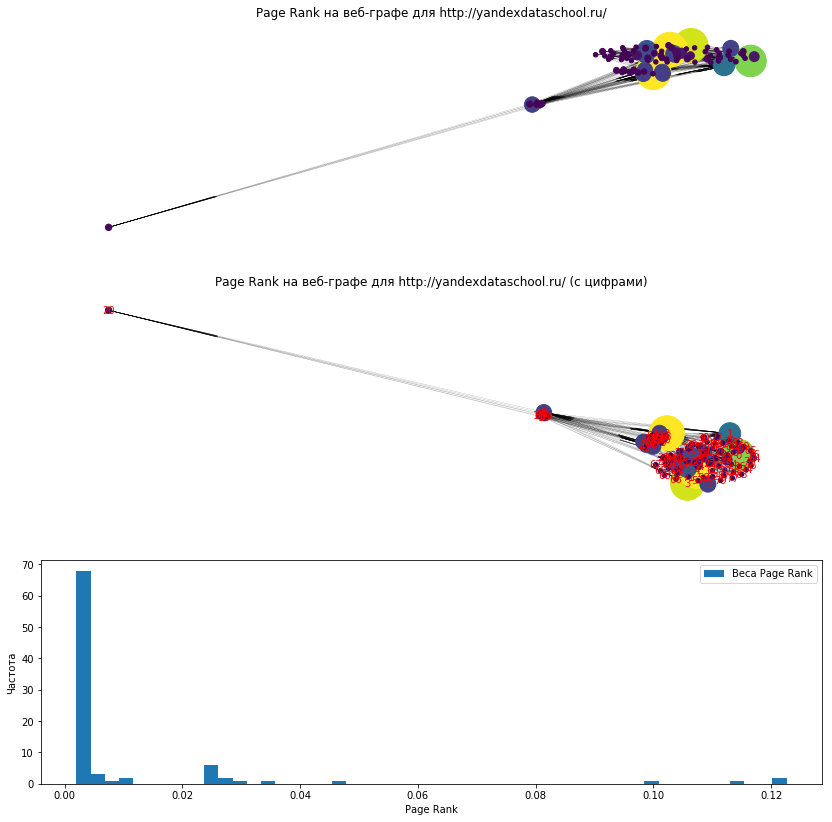

In [42]:
start_distribution = np.ones(N)/N 
show_hist = True
pr_distribution, pr_trace  = page_rank(links, start_distribution,
                                       return_trace=True)

size_const = 10 ** 4

plt.figure(figsize=(14, 14))
plt.subplot(311)
plt.axis('off')
G = networkx.DiGraph()
G.add_edges_from(links)

print("Число итераций = ", pr_trace.shape[0])
#print("Веса PR = ", pr_distribution)
networkx.draw_networkx(G, width=0.1, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution, with_labels=False,
                       font_size=8)

plt.title("Page Rank на веб-графе для http://yandexdataschool.ru/")

plt.subplot(312)
plt.axis('off')

networkx.draw_networkx(G, width=0.1, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution, with_labels=True,
                       font_size=10, font_color="red")

plt.title("Page Rank на веб-графе для http://yandexdataschool.ru/ (с цифрами)")

if (show_hist):
    plt.subplot(313)
    plt.hist(pr_distribution, label="Веса Page Rank", bins=50)
    plt.ylabel("Частота")
    plt.xlabel("Page Rank")
    plt.legend()
    plt.show()
        

________
**Комментарий:** PR сошёлся за 18 итераций для сайта из 89 страниц. Это говорит том, что алгоритм можно применять на практике, он быстро работает.  (Число операций на итерацию порядка $O(N^2)$)
________

Проанализируем 15 самых крупных (по PR) страниц.

In [27]:
sorted_pr = [(pr_distribution[ind], ind) for ind in range(N)]
sorted_pr.sort()
top_15 = [ind for (pr, ind) in sorted_pr[-15:]]

top_15.sort()  # нужно для корректного отображения весов

N_reduce = len(top_15)
E_reduce = []
for edge in links:
    fr, to = edge
    if (fr in top_15) and (to in top_15):
        E_reduce.append(edge)
PR_reduce = np.array([pr_distribution[ind] for ind in top_15])
print(top_15)
print(PR_reduce)

[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[ 0.09943067  0.04716071  0.12262979  0.11461246  0.12262979  0.03520625
  0.02396159  0.02396159  0.02396159  0.02396159  0.02396159  0.02555233
  0.02718893  0.02718893  0.02960531]


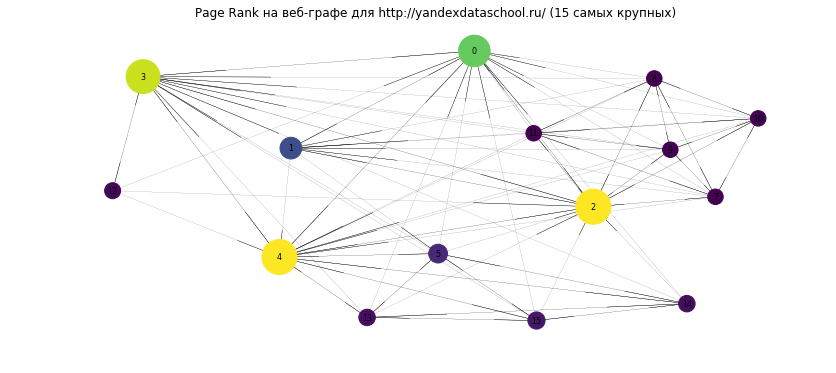

In [28]:
size_const = 10 ** 4

plt.figure(figsize=(14, 6))
plt.axis('off')
G = networkx.DiGraph()
G.add_edges_from(E_reduce)

networkx.draw_networkx(G, width=0.1, node_size=size_const * PR_reduce, 
                       node_color=PR_reduce, with_labels=True,
                       font_size=8)
plt.title("Page Rank на веб-графе для http://yandexdataschool.ru/"
          + " (15 самых крупных)")
plt.show()

_______
Посмотрим на 15 самых крупных по PR сайтов:
_______

In [29]:
for pr, ind in (sorted_pr[-15:])[::-1]:
    print("PR = %f, Url = %s" % (pr, urls[ind]))

PR = 0.122630, Url = http://yandexdataschool.ru/edu-process
PR = 0.122630, Url = http://yandexdataschool.ru/about
PR = 0.114612, Url = http://yandexdataschool.ru/admission
PR = 0.099431, Url = http://yandexdataschool.ru/
PR = 0.047161, Url = http://yandexdataschool.ru/milestones
PR = 0.035206, Url = http://yandexdataschool.ru/edu-process/online-courses
PR = 0.029605, Url = http://yandexdataschool.ru/edu-process/courses
PR = 0.027189, Url = http://yandexdataschool.ru/edu-process/teachers
PR = 0.027189, Url = http://yandexdataschool.ru/edu-process/program
PR = 0.025552, Url = http://yandexdataschool.ru/admission/faq
PR = 0.023962, Url = http://yandexdataschool.ru/about/contacts
PR = 0.023962, Url = http://yandexdataschool.ru/about/graduates
PR = 0.023962, Url = http://yandexdataschool.ru/about/collaborations
PR = 0.023962, Url = http://yandexdataschool.ru/about/branches
PR = 0.023962, Url = http://yandexdataschool.ru/about/administration


_______
Посмотрим на 5 самых мелких по PR сайтов:
_______

In [30]:
for pr, ind in sorted_pr[:5]:
    print("PR = %f, Url = %s" % (pr, urls[ind]))

PR = 0.001974, Url = http://yandexdataschool.ru/edu-process/program/data-analysis/empirical
PR = 0.001974, Url = http://yandexdataschool.ru/edu-process/program/data-analysis/stochastic
PR = 0.001974, Url = http://yandexdataschool.ru/edu-process/program/data-analysis/algorithms
PR = 0.001974, Url = http://yandexdataschool.ru/edu-process/program/data-analysis/machine-learning
PR = 0.001974, Url = http://yandexdataschool.ru/edu-process/program/data-analysis/sequences


**Комментарий:** несложно заметить, что page rank больше у более значимых (как минимум в смысле числа ссылок, и числа ссылок у страниц, которые ссылаются на данную, и ....) страниц, таких, как главная, о ШАДе, о поступлении онлайн-курсах и прочем. Если рассматривать эти ссылки обособлено от того, как они были получены, то это самые важные с точки нового пользователя (который не видел сайт) страницы. Наоборот, самый малый PR у программ курсов, которые и найти по ссылкам сложнее, и интересны они меньшему числу человек. 

По результатам для этого сайта кажется очень разумным использовать PR в качестве ранжирующей системы 

**Использование page rank без доведения до сходимости:**

В случае, если при вычислении page rank мы не доводим вычисление до сходимости, то мы получаем некоторый прогноз поведения пользователя в данной модели: для $\Pi^{(k)}$ это будут вероятности для пользователя за k шагов добраться до всех страниц, если вероятность его нахождения в начальный момент описывается распределением $\Pi^{(0)}$. В частности, если в начальном распредении вероятность находения в какой-то странице равна 1, то $\Pi^{(k)}$ описывает вероятности попасть во все страницы за k шагов. Так мы можем предсказывать поведение пользователя.

Попробуем предсказать поведение пользователя для двух шагов.

In [31]:
sorted_pr_trace = [(pr_trace[2, 0, ind], ind) for ind in range(N)]
sorted_pr_trace.sort()
top_15_trace = [ind for (pr, ind) in sorted_pr_trace[-15:]]

top_15_trace.sort()  # нужно для корректного отображения весов

N_reduce_trace = len(top_15_trace)
E_reduce_trace = []
for edge in links:
    fr, to = edge
    if (fr in top_15_trace) and (to in top_15_trace):
        E_reduce_trace.append(edge)
PR_reduce_trace = np.array([pr_trace[2, 0, ind] for ind in top_15])
print(top_15_trace)
print(PR_reduce_trace)

[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[ 0.09192698  0.04864201  0.11794598  0.11442232  0.11794598  0.02857135
  0.02262301  0.02262301  0.02262301  0.02262301  0.02262301  0.02336524
  0.02504769  0.02504769  0.0288149 ]


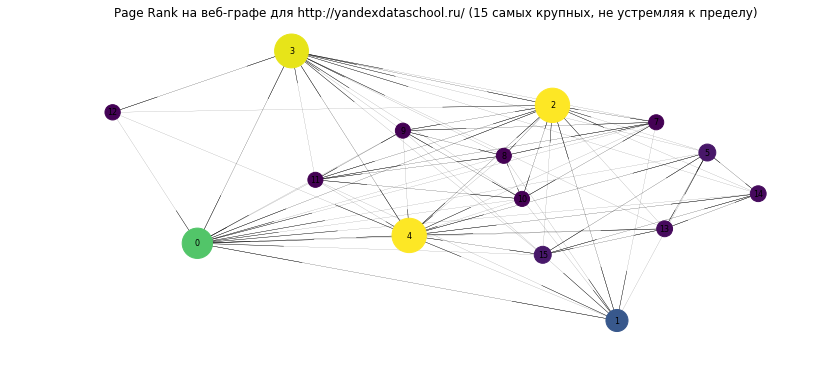

In [32]:
size_const = 10 ** 4

plt.figure(figsize=(14, 6))
plt.axis('off')
G = networkx.DiGraph()
G.add_edges_from(E_reduce_trace)

networkx.draw_networkx(G, width=0.1, node_size=size_const * PR_reduce_trace, 
                       node_color=PR_reduce_trace, with_labels=True,
                       font_size=8)
plt.title("Page Rank на веб-графе для http://yandexdataschool.ru/" +
          " (15 самых крупных, не устремляя к пределу)")
plt.show()

_______
Посмотрим на 15 самых крупных по PR сайтов(для двух шагов алгоритма): 
_______

In [33]:
for pr, ind in (sorted_pr_trace[-15:])[::-1]:
    print("PR = %f, Url = %s" % (pr, urls[ind]))

PR = 0.117946, Url = http://yandexdataschool.ru/edu-process
PR = 0.117946, Url = http://yandexdataschool.ru/about
PR = 0.114422, Url = http://yandexdataschool.ru/admission
PR = 0.091927, Url = http://yandexdataschool.ru/
PR = 0.048642, Url = http://yandexdataschool.ru/milestones
PR = 0.028815, Url = http://yandexdataschool.ru/edu-process/courses
PR = 0.028571, Url = http://yandexdataschool.ru/edu-process/online-courses
PR = 0.025048, Url = http://yandexdataschool.ru/edu-process/teachers
PR = 0.025048, Url = http://yandexdataschool.ru/edu-process/program
PR = 0.023365, Url = http://yandexdataschool.ru/admission/faq
PR = 0.022623, Url = http://yandexdataschool.ru/about/contacts
PR = 0.022623, Url = http://yandexdataschool.ru/about/graduates
PR = 0.022623, Url = http://yandexdataschool.ru/about/collaborations
PR = 0.022623, Url = http://yandexdataschool.ru/about/branches
PR = 0.022623, Url = http://yandexdataschool.ru/about/administration


_______
Посмотрим на 5 самых мелких по PR сайтов(для двух шагов алгоритма):
_______

In [34]:
for pr, ind in sorted_pr_trace[:5]:
    print("PR = %f, Url = %s" % (pr, urls[ind]))

PR = 0.002263, Url = http://yandexdataschool.ru/about/collaborations#computersciencecenter
PR = 0.002353, Url = http://yandexdataschool.ru/edu-process/program/data-analysis/empirical
PR = 0.002353, Url = http://yandexdataschool.ru/edu-process/program/data-analysis/stochastic
PR = 0.002353, Url = http://yandexdataschool.ru/edu-process/program/data-analysis/algorithms
PR = 0.002353, Url = http://yandexdataschool.ru/edu-process/program/data-analysis/machine-learning


**Комментарий:** для двух шагов ответ не сильно отличается от предельного: изменились числа, но в относительном порядке мало что изменилось. В самых слабых страницах добавилась страница о CS - центре, но пропала страница "Анализ символьных последовательностей с точки зрения биоинформатики", при том, что относительный порядок остальных страниц не изменился.

Топ-15 не изменился по множеству страниц, но их относительный порядок слегка изменился. (Страницы из каталога http://yandexdataschool.ru/edu-process/ переставились)

Таким образом, для оценки относительного положения страниц можно даже не дожидаться сходимости, экономя вычислительные ресурсы. 

________________
** Дополнительно (page rank, не доводимый до сходимости): ** Предположим, что наш сайт (или сайты) - представляют из себя несколько компонент, близких к полному графу, но сами компоненты почти не связаны. Создадим такой граф (случайно) и запустим на нём несколько итерации Page Rank.

In [126]:
K = 3  # число почти полных подграфах 
M = 5  # число вершин в подграфах

def clusters_graph(K, M, inner_prob=0.8, outer_prob=0.05):
    ''' Возвращает граф (число вершин, список рёбер) из K почти 
    полных компонент по M вершин в каждой'''
    N = K * M
    edges = []
    for i_k in range(K):
        for fr_vertex in range(i_k * M, (i_k + 1) * M):
            for to_vertex in range(i_k * M, (i_k + 1) * M):
                if (bernoulli(inner_prob).rvs(1) == 1):
                    edges.append((fr_vertex, to_vertex))
    for fr_vertex in range(N):
        for to_vertex in range(N):
            if (bernoulli(outer_prob).rvs(1) == 1):
                edges.append((fr_vertex, to_vertex))
    return N, edges

N, edges = clusters_graph(K, M);

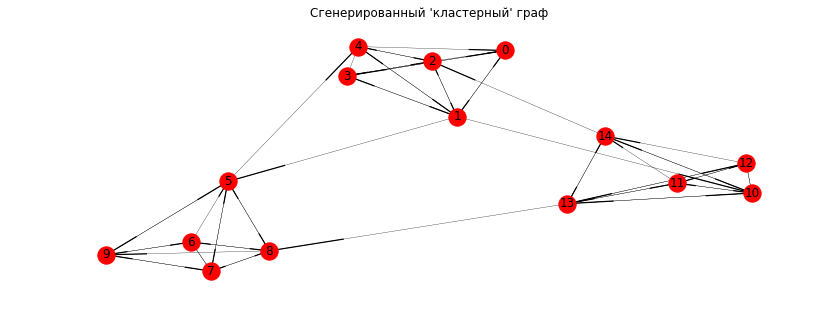

In [127]:
plt.figure(figsize=(14, 5))
G = networkx.DiGraph()
G.add_edges_from(edges)
networkx.draw_networkx(G, width=0.3)
plt.axis('off')
plt.title("Сгенерированный 'кластерный' граф")
plt.show()

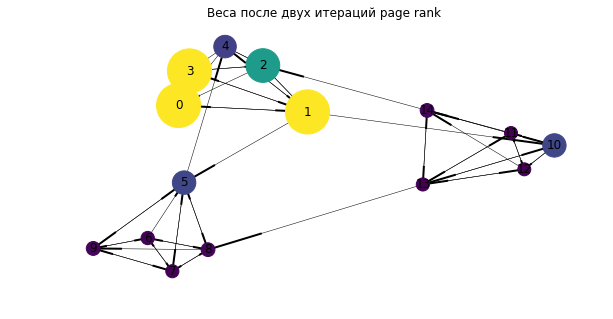

In [128]:
start_distribution = np.zeros(N)
start_distribution[0] = 1
pr_distribution, pr_trace = page_rank(edges, start_distribution, return_trace=True)

size_const = 10 ** 4

plt.figure(figsize=(10, 5))
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_trace[2], 
                       node_color=pr_trace[2])
plt.title("Веса после двух итераций page rank")
plt.show()

**Комментарий:** Предсказуемо, что недоведённый до сходимости page rank, запущенный на описанном выше "кластерном" графе с начальным распределением таким, что с вероятностью 1 мы находимся в какой-то вершине компоненты K, даёт веса у вершин из компоненты К значительно большие, чем у вершин не из компоненты К.

Такии образом, можно построить алгоритм классификации, который будет искать похожие - лежащие в одной компоненте - статьи или же кластеризации, который будет выделять такие "сильно связанные" компоненты.

В случае веб-графа эту "похожесть" с оговорками трактовать как выделение статей со связанным по смыслу содержанием (с оговорками, т.к., например, в случае Википедии статья о насекомых будет связана по смыслу со статьёй о правилах написания статей в Википедию)


## Дополнительно: Алгоритм кластеризации
Для доказательства возможности такого алгоритма, напишем его

In [132]:
def pr_clusterization(N, edges, runs = 2, avg_cluster_size=5, agreement_level=0.01):
    pr_matrix = create_page_rank_markov_chain(edges, N=N)
    # создаём матрицу переходных вероятностей
    
    start_distributions = np.eye(N)
    pr_distribution = start_distributions
    for i in range(runs):
        pr_distribution = pr_distribution @ pr_matrix
    # так мы нашли p_{ij}^{(runs)}, т.е. с помощью матричных операций
    # мы нашли результат N запусков по runs итераций алгоритма поиска page rank
    # для начальных распределений - строк start_distributions - 
    # т.е. распределений вида (0, ... 0, 1, 0 ... 0) для все N позиций

    cluster_edge_list = [[] for i in range(N)]
    for i in range(N):
        for j in range(N):
            if (pr_distribution[i,j] * pr_distribution[j,i] >= agreement_level):
                cluster_edge_list[i].append(j)
                cluster_edge_list[j].append(i)
            # вершины i,j считаем эквивалентными, если вероятности добраться из i в j
            # за runs итераций и вернуться обратно за runs итераций не меньше
            # agreement_level (возможно, имеет смысл смотреть тоже самое для 
            # "не больше, чем за runs итераций" - для этого достаточно хранить все
            # переходные вероятности)
                
                
    # выделим классы эквивалентности с помощью DFS
    clusters = np.ones(N, dtype=int) * -1
    for i in range(N):
        if (clusters[i] == -1):
            dfs(N, i, cluster_edge_list, clusters)
    return clusters

def dfs(N, v, edges, clusters, color = None):
    if (color is None):
        color = v
    if (clusters[v] != -1):
        return
    clusters[v] = color
    for target in edges[v]:
        dfs(N, target, edges, clusters, color)

In [133]:
clusters = pr_clusterization(N, edges) / N  # отнормируем классы, чтобы сделать их цветами.

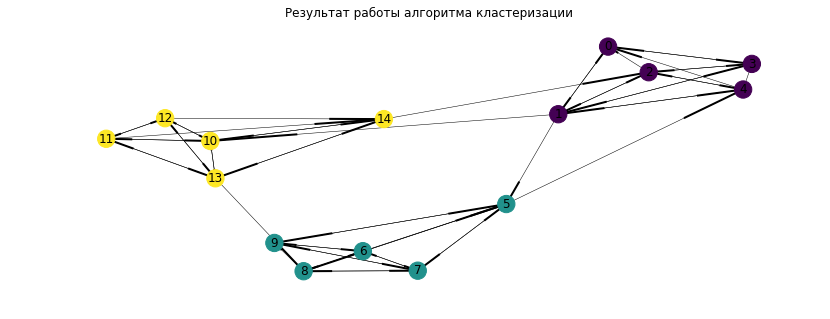

In [134]:
plt.figure(figsize=(14, 5))
G = networkx.DiGraph()
G.add_edges_from(edges)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_color=(clusters + .3) / 2)
plt.title("Результат работы алгоритма кластеризации")
plt.show()

** Комментарий: ** Как видим, алгоритм, использующий такой принцип может быть полезен, хотя, возможно, стоит считать вероятности более сложных путей в вершину и обратно.

Примечание: кластеры выделяются и в менее тривиальных случаях, но они менее наглядны